In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from spectral import *
import spectral.io.envi as envi

### Data Check

In [2]:
imageUnsup=pd.read_pickle("./MinMapKmeans.pkl")
imageUnsup.head()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,minerals
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


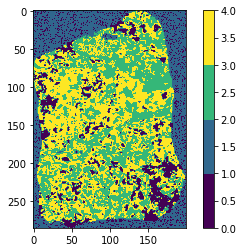

In [3]:
imageNpy=imageUnsup.to_numpy()
groundTruth=imageNpy.reshape(285, 200, 231)
gt=groundTruth[:, :, 230]
plt.imshow(gt, cmap=plt.cm.get_cmap('viridis',4))
plt.colorbar()

In [21]:
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import minmax_scale
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical

In [5]:
X=imageUnsup.iloc[:, :-1]
y=to_categorical(imageUnsup.loc[:,'minerals'])
X_scaled=minmax_scale(X, axis = 0)

X_scaled.shape, y.shape

((57000, 230), (57000, 5))

In [6]:
X=imageUnsup.iloc[:, :-1]
y=to_categorical(imageUnsup.loc[:,'minerals'])

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y,test_size=0.30)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}") 


X_train: (39900, 230)
y_train: (39900, 5)
X_test: (17100, 230)
y_test: (17100, 5)


In [7]:
X_train = X_train.reshape(-1, 230, 1)
X_test = X_test.reshape(-1, 230, 1)

In [8]:
model = Sequential(name = 'MinMap_CNN')

model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu', input_shape =(230,1), name = 'Layer1'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer2'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer3'))

model.add(MaxPooling1D(pool_size = 2, name = 'MaxPooling_Layer1'))
model.add(Dropout(0.4, name = 'Dropout1'))

model.add(Flatten(name = 'Flatten'))

model.add(Dense(25, activation='relu', name = 'DenseLayer'))

model.add(Dense(y_train.shape[1], activation='softmax', name = 'OutputLayer'))


model.summary()

Model: "MinMap_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Conv1D)              (None, 228, 64)           256       
_________________________________________________________________
Layer2 (Conv1D)              (None, 226, 64)           12352     
_________________________________________________________________
Layer3 (Conv1D)              (None, 224, 64)           12352     
_________________________________________________________________
MaxPooling_Layer1 (MaxPoolin (None, 112, 64)           0         
_________________________________________________________________
Dropout1 (Dropout)           (None, 112, 64)           0         
_________________________________________________________________
Flatten (Flatten)            (None, 7168)              0         
_________________________________________________________________
DenseLayer (Dense)           (None, 25)                1

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=256, epochs=100)


Train on 39900 samples
Epoch 1/100
39900/39900 [==============================] - 43s 1ms/sample - loss: 0.4148 - accuracy: 0.8409
Epoch 2/100
39900/39900 [==============================] - 30s 743us/sample - loss: 0.0859 - accuracy: 0.9659
Epoch 3/100
39900/39900 [==============================] - 30s 763us/sample - loss: 0.0768 - accuracy: 0.9663
Epoch 4/100
39900/39900 [==============================] - 31s 769us/sample - loss: 0.0632 - accuracy: 0.9741
Epoch 5/100
39900/39900 [==============================] - 31s 771us/sample - loss: 0.0583 - accuracy: 0.9741
Epoch 6/100
39900/39900 [==============================] - 31s 775us/sample - loss: 0.0799 - accuracy: 0.9676
Epoch 7/100
39900/39900 [==============================] - 31s 775us/sample - loss: 0.0522 - accuracy: 0.9779
Epoch 8/100
39900/39900 [==============================] - 31s 781us/sample - loss: 0.0543 - accuracy: 0.9772
Epoch 9/100
39900/39900 [==============================] - 31s 777us/sample - loss: 0.0619 - accura

39900/39900 [==============================] - 49s 1ms/sample - loss: 0.0411 - accuracy: 0.9827
Epoch 75/100
39900/39900 [==============================] - 49s 1ms/sample - loss: 0.0358 - accuracy: 0.9848
Epoch 76/100
39900/39900 [==============================] - 49s 1ms/sample - loss: 0.0423 - accuracy: 0.9811
Epoch 77/100
39900/39900 [==============================] - 45s 1ms/sample - loss: 0.0341 - accuracy: 0.9860
Epoch 78/100
39900/39900 [==============================] - 43s 1ms/sample - loss: 0.0409 - accuracy: 0.9825
Epoch 79/100
39900/39900 [==============================] - 43s 1ms/sample - loss: 0.0330 - accuracy: 0.9862
Epoch 80/100
39900/39900 [==============================] - 43s 1ms/sample - loss: 0.0329 - accuracy: 0.9854
Epoch 81/100
39900/39900 [==============================] - 43s 1ms/sample - loss: 0.0294 - accuracy: 0.9874
Epoch 82/100
39900/39900 [==============================] - 35s 889us/sample - loss: 0.0338 - accuracy: 0.9858
Epoch 83/100
39900/39900 [====

In [10]:
score = model.evaluate(X_test, y_test, batch_size=256)

17100/17100 [==============================] - 4s 233us/sample - loss: 0.0448 - accuracy: 0.9777


In this case, the result seems too optimistic. It is simply because of the ground truth used in this case is a clustering classification result, which done earlier in this process without further detail validation. Our classes are only rely on the data-based analysis which resulting a very optimistic result.

In the actual case, this kind of result might be caused by the overfit. Below is the introduction of early stopping technique to reduce the overfitting result. 

In [11]:
#introduce early stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

earlyStop = EarlyStopping(monitor = 'val_loss',
                            mode = 'min',
                            min_delta = 0,
                            patience = 10,
                            restore_best_weights = True)

checkPoint = ModelCheckpoint(filepath = 'minmap.h5', 
                             monitor = 'val_loss', 
                             mode ='min', 
                             save_best_only = True)


In [12]:
hist = model.fit(X_train, 
                       y_train, 
                       epochs = 100, 
                       batch_size = 256 , 
                       validation_data = (X_test, y_test), 
                       callbacks=[earlyStop,
                                  checkPoint])

Train on 39900 samples, validate on 17100 samples
Epoch 1/100
39900/39900 [==============================] - 34s 841us/sample - loss: 0.0326 - accuracy: 0.9856 - val_loss: 0.0515 - val_accuracy: 0.9764
Epoch 2/100
39900/39900 [==============================] - 35s 878us/sample - loss: 0.0561 - accuracy: 0.9791 - val_loss: 0.0630 - val_accuracy: 0.9680
Epoch 3/100
39900/39900 [==============================] - 37s 926us/sample - loss: 0.0294 - accuracy: 0.9878 - val_loss: 0.0336 - val_accuracy: 0.9839
Epoch 4/100
39900/39900 [==============================] - 38s 940us/sample - loss: 0.0338 - accuracy: 0.9856 - val_loss: 0.0241 - val_accuracy: 0.9893
Epoch 5/100
39900/39900 [==============================] - 37s 922us/sample - loss: 0.0293 - accuracy: 0.9873 - val_loss: 0.0273 - val_accuracy: 0.9890
Epoch 6/100
39900/39900 [==============================] - 37s 920us/sample - loss: 0.0319 - accuracy: 0.9861 - val_loss: 0.0435 - val_accuracy: 0.9811
Epoch 7/100
39900/39900 [=============

In [14]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Accuracy: {acc*100}\nLoss: {loss}")

17100/17100 [==============================] - 5s 281us/sample - loss: 0.0166 - accuracy: 0.9958
Accuracy: 99.57894682884216
Loss: 0.016586692493139325


In [15]:
from tensorflow.keras.models import load_model

model = load_model("minmap.h5")

In [16]:
pred = np.argmax(model.predict(X_test), axis=1)

In [17]:
print(y_test.shape)
print(pred)

(17100, 5)
[4 2 2 ... 0 4 4]


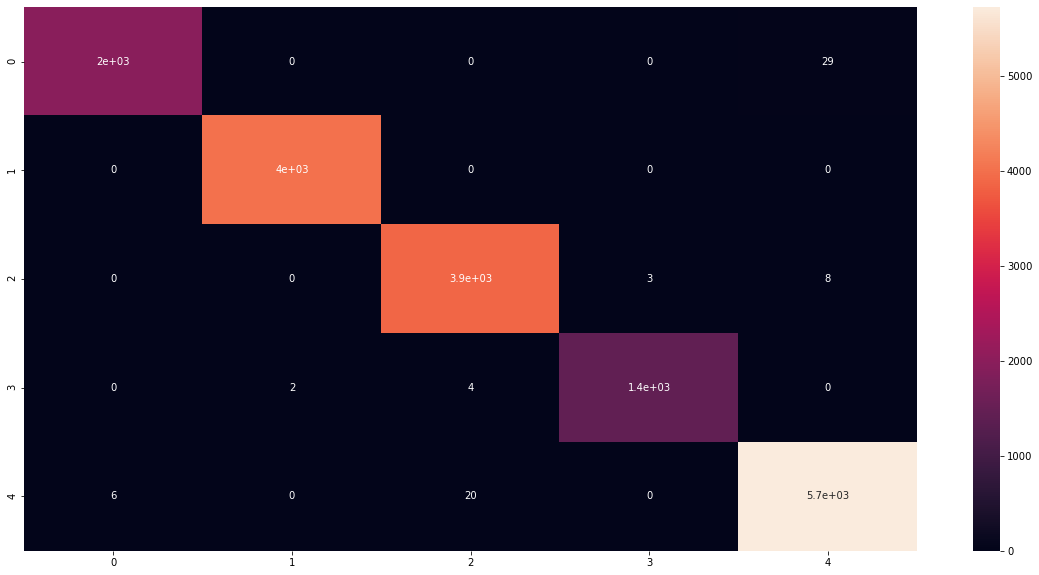

In [18]:
plt.figure(figsize = (20,10))
confmat=confusion_matrix(np.add(pred, 1), np.add(np.argmax(y_test, 1), 1))
import seaborn as sns
sns.heatmap(confmat, annot=True)

In [22]:
print(classification_report(pred, np.argmax(y_test, 1)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2006
           1       1.00      1.00      1.00      4020
           2       0.99      1.00      1.00      3891
           3       1.00      1.00      1.00      1437
           4       0.99      1.00      0.99      5746

    accuracy                           1.00     17100
   macro avg       1.00      0.99      1.00     17100
weighted avg       1.00      1.00      1.00     17100



(255, 246, 230)


ImageView object:
  Display bands       :  (0, 200, 220)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.4755154550075531]
    G: [0.0, 0.4598034918308258]
    B: [0.0, 0.3776836693286896]

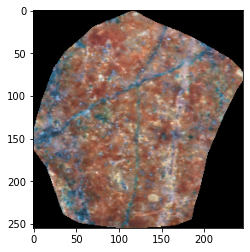

In [23]:
a76_ref = envi.open('76a_101012-114750_refl_ss.hdr', '76a_101012-114750_refl_ss.dat')
a76_data = np.array(a76_ref.load())
print (a76_data.shape) # wavelength1043-2486 nm in 230 bands
imshow(a76_data, (0, 200, 220))

In [24]:
a76_pixels=a76_data.reshape((62730, 230))
a76_scaled=minmax_scale(a76_pixels, axis = 0)
print (a76_scaled.shape)
a76_scaled = a76_scaled.reshape(-1, 230, 1)

(62730, 230)


In [ ]:
a76_pred = np.argmax(model.predict(a76_scaled), axis=1)

In [132]:
a76=pd.DataFrame(a76_pixels)
a76['minpred']=a76_pred
a76.describe()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,minpred
count,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,...,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000,62730.000000
mean,0.188393,0.188889,0.189291,0.189634,0.190035,0.190476,0.190834,0.191098,0.191436,0.191796,...,0.105839,0.105285,0.105539,0.106172,0.107103,0.108220,0.109309,0.110186,0.110936,2.147696
std,0.128757,0.129312,0.129718,0.130134,0.130571,0.131025,0.131443,0.131803,0.132190,0.132589,...,0.075499,0.075084,0.075163,0.075481,0.075995,0.076627,0.077218,0.077702,0.078024,1.365271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.240671,0.240867,0.241387,0.241713,0.242038,0.242410,0.242500,0.242609,0.243037,0.243163,...,0.122673,0.121983,0.122532,0.123535,0.125077,0.126817,0.128517,0.129871,0.131179,2.000000
75%,0.286753,0.287695,0.288513,0.289111,0.290016,0.290788,0.291437,0.291922,0.292821,0.293475,...,0.159524,0.158732,0.159173,0.159931,0.161221,0.162821,0.164476,0.165695,0.166568,4.000000
max,0.475515,0.474927,0.478830,0.486132,0.490920,0.492449,0.498140,0.497966,0.504788,0.505084,...,0.373878,0.368603,0.367045,0.366803,0.370623,0.368081,0.367456,0.368606,0.374251,4.000000


In [134]:
a76npy=a76.to_numpy()
a76_classified=a76npy.reshape(255, 246, 231)
MinMapCNN=a76_classified[:, :, 230]

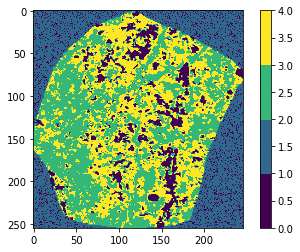

In [135]:
plt.imshow(MinMapCNN, cmap=plt.cm.get_cmap('viridis',4))
plt.colorbar()

# CATBoost Model

In [60]:
from xgboost import XGBRegressor
def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))


model = XGBRegressor()
model.fit(X_train, y_train)

# Train performance
pred_train = model.predict(X_train)
print('RMSE train: ', rmse(y_train, pred_train))

# Test performance 
pred_test = model.predict(X_test)
print('RMSE test:', rmse(y_test, pred_test))

RMSE train:  0.07164940950541221
RMSE test: 0.270126142815618


## Load New data

In [116]:
data_ref = envi.open('76a_101012-114750_refl_ss.hdr', '76a_101012-114750_refl_ss.dat')
data = np.array(data_ref.load())
print (data.shape) # wavelength1043-2486 nm in 230 bands

(255, 246, 230)


In [117]:
head=['0  ', '1  ', '2  ', '3  ', '4  ', '5  ', '6  ', '7  ', '8  ', '9  ', '10 ', '11 ', '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ', '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ', '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ', '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ', '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ', '57 ', '58 ', '59 ', '60 ', '61 ', '62 ', '63 ', '64 ', '65 ', '66 ', '67 ', '68 ', '69 ', '70 ', '71 ', '72 ', '73 ', '74 ', '75 ', '76 ', '77 ', '78 ', '79 ', '80 ', '81 ', '82 ', '83 ', '84 ', '85 ', '86 ', '87 ', '88 ', '89 ', '90 ', '91 ', '92 ', '93 ', '94 ', '95 ', '96 ', '97 ', '98 ', '99 ', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229']
pixels = data.reshape(((data.shape[0]*data.shape[1]), 230))
imagenew=pd.DataFrame(pixels, columns=head)

In [118]:
imgMin=model.predict(imagenew)
imagenew['minerals']=imgMin.astype(int)

In [119]:
imagenpy=imagenew.to_numpy()
classified=imagenpy.reshape(255, 246, 231)
MinMapXGBoost=classified[:, :, 230]

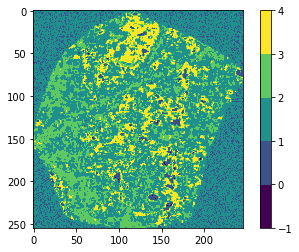

In [120]:
plt.imshow(MinMapXGBoost, cmap=plt.cm.get_cmap('viridis',5))
plt.colorbar()